In [ ]:
# This file was used to test 4 different ratios of undersampled data to oversampled
# We used SMOTE to oversample and RandomUndersampler to undersample the imbalanced data
# We tested different ratios of 1:1, 2:1, 4:1, 10:1
# This test was split into two files with the other ML models being tested in the other file 
# This was made so you can run the tests on two different nodes at the same time, since the file takes ~20-30 hours to run

In [2]:
#Load libaries
import os
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from pydotplus import graph_from_dot_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC 
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
            

In [3]:
#Load datasets
data = pd.read_csv('2013_4month.csv', on_bad_lines='skip')   

### Looking into 2013 Data

In [4]:
full_data = pd.read_csv('2013-data-output.csv', on_bad_lines='skip')   

In [5]:
#full_data.describe()

In [6]:
full_data.isnull().sum() # return number of missing value for each column

Unnamed: 0    0
Date          0
Longitude     0
Latitude      0
EVI           0
TA            0
LST           0
Wind          0
Fire          0
dtype: int64

In [7]:
Count=full_data.Fire.value_counts() #count target feature 
Count

0    97686307
1       80038
Name: Fire, dtype: int64

In [8]:
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')

Proportion: 1220.5 : 1


In [9]:
data = full_data

# Cleaning the data

## Isolating to a spacific range of dataes

In [10]:
# Create a boolean mask for x days
#mask = (data['Date'] >= '2013-01-02') & (data['Date'] <= '2013-02-02')
#data = data[mask]
#data.Date.value_counts()

## Data Cleaning

In [11]:
data.head()

,Unnamed: 0,Date,Longitude,Latitude,EVI,TA,LST,Wind,Fire
0,0,2013-01-01,-123.754626,41.994986,3308,5,0,21,0
1,1,2013-01-01,-123.750462,41.994986,3477,5,0,21,0
2,2,2013-01-01,-123.746298,41.994986,3477,5,0,21,0
3,3,2013-01-01,-123.742134,41.994986,4475,5,0,21,0
4,4,2013-01-01,-123.737970,41.994986,3000,5,13707,21,0


In [12]:
data = data[data['Date'] != '2013-01-01'] #Dropping the first day that has missing LST data

In [13]:
data.head()

,Unnamed: 0,Date,Longitude,Latitude,EVI,TA,LST,Wind,Fire
267853,267853,2013-01-02,-123.754626,41.994986,3375,5,13639,26,0
267854,267854,2013-01-02,-123.750462,41.994986,3524,5,13639,26,0
267855,267855,2013-01-02,-123.746298,41.994986,3524,5,13639,26,0
267856,267856,2013-01-02,-123.742134,41.994986,4460,5,13639,26,0
267857,267857,2013-01-02,-123.737970,41.994986,3115,5,13677,26,0


In [14]:
#if 'Date' in data:
data = data.drop(['Date', 'Longitude', 'Latitude'], axis = 1) 
data.head()

,Unnamed: 0,EVI,TA,LST,Wind,Fire
267853,267853,3375,5,13639,26,0
267854,267854,3524,5,13639,26,0
267855,267855,3524,5,13639,26,0
267856,267856,4460,5,13639,26,0
267857,267857,3115,5,13677,26,0


In [15]:
data.isnull().sum() # return number of missing value for each column

Unnamed: 0    0
EVI           0
TA            0
LST           0
Wind          0
Fire          0
dtype: int64

In [16]:
data.dropna(axis=0, inplace=True) # drop the rows with null values
data.isnull().sum() # return number of missing value for each column

Unnamed: 0    0
EVI           0
TA            0
LST           0
Wind          0
Fire          0
dtype: int64

In [17]:
data.TA.value_counts()

 5      88881052
 4       7813898
 3        777155
 9         12990
 8          6266
-999        6188
 7           919
 6            24
Name: TA, dtype: int64

In [18]:
data = data[data.TA !=-999] 
data = data[data.TA != 3]
data = data[data.TA != 4]

In [19]:
data.TA.value_counts()

5    88881052
9       12990
8        6266
7         919
6          24
Name: TA, dtype: int64

In [20]:
Count=data.Fire.value_counts() #count target feature 
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')
Count

Proportion: 1209.89 : 1


0    88827833
1       73418
Name: Fire, dtype: int64

In [21]:
data.LST.value_counts()

0        112921
15062     56627
15060     56322
15027     56241
15084     56220
          ...  
17283         1
12859         1
16890         1
12797         1
16886         1
Name: LST, Length: 3990, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88901251 entries, 267853 to 97766344
Data columns (total 6 columns):
 #   Column      Dtype
---  ------      -----
 0   Unnamed: 0  int64
 1   EVI         int64
 2   TA          int64
 3   LST         int64
 4   Wind        int64
 5   Fire        int64
dtypes: int64(6)
memory usage: 4.6 GB


In [23]:
data.describe() # Statistic summary

,Unnamed: 0,EVI,TA,LST,Wind,Fire
count,8.890125e+07,8.890125e+07,8.890125e+07,8.890125e+07,8.890125e+07,8.890125e+07
mean,5.008608e+07,2.750837e+03,5.000817e+00,1.471818e+04,2.360307e+01,8.258376e-04
std,2.750768e+07,9.846965e+02,5.489236e-02,7.821603e+02,1.537075e+01,2.872552e-02
min,2.678530e+05,-3.000000e+03,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.711508e+07,2.072000e+03,5.000000e+00,1.429400e+04,1.200000e+01,0.000000e+00
50%,5.057289e+07,2.757000e+03,5.000000e+00,1.473800e+04,2.100000e+01,0.000000e+00
75%,7.358747e+07,3.425000e+03,5.000000e+00,1.516000e+04,3.100000e+01,0.000000e+00
max,9.776634e+07,9.256000e+03,9.000000e+00,1.758000e+04,2.550000e+02,1.000000e+00


## Dividing The Data to be sent to Gretel

In [24]:
#gretle_data = data[data.Fire == 1]
#print(len(gretle_data))
#len(data)-32

In [25]:
#gretle_data.to_csv('gretle_data.csv')

In [26]:
#data.to_csv('10_day_data.csv')

In [27]:
gretle_1_to_1 = pd.read_csv('gretle_data_1_to_1.csv', on_bad_lines='skip')
gretle_1_to_1.head()

,Unnamed: 0,EVI,TA,LST,Wind,Fire
0,1255766,-9999.0,5.0,13816.0,-9999.0,1.0
1,1247033,-9999.0,5.0,13825.0,-9999.0,1.0
2,1270936,-9999.0,5.0,13808.0,-9999.0,1.0
3,1394565,-9999.0,5.0,13818.0,-9999.0,1.0
4,1243489,-9999.0,5.0,13828.0,-9999.0,1.0


# Splitting Data & Scaling Data
We are making the data have similar range for the machine model to not weight one varible bigger then the other

In [28]:
# Getting the X & Y
X = data.drop(columns=['Fire']).values
Y = data['Fire'].values
    
# Labeling the variables
scale = StandardScaler()
X = scale.fit_transform(X) 


In [29]:
# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                         # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 16) 

# Fixing the Imbalanced Data

## Combining Oversampled & Oversampled Data

### SMOTE + Random Under Sampler || 1:1 Ratio

In [30]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampling_ratio = 0.1
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

undersample_ratio = 1
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
over = SMOTE(sampling_strategy=oversampling_ratio, n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_1_1, y_train_1_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_1_1)
print('After',counter)

Before Counter({0: 53296930, 1: 43820})
After Counter({0: 5329693, 1: 5329693})


### SMOTE + Random Under Sampler || 2:1 Ratio

In [31]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampling_ratio = 0.1
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

undersample_ratio = 0.5
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
over = SMOTE(sampling_strategy=oversampling_ratio, n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_2_1, y_train_2_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_2_1)
print('After',counter)

Before Counter({0: 53296930, 1: 43820})
After Counter({0: 10659386, 1: 5329693})


### SMOTE + Random Under Sampler || 4:1 Ratio

In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampling_ratio = 0.1
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

undersample_ratio = 0.25
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
over = SMOTE(sampling_strategy=oversampling_ratio, n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_4_1, y_train_4_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_4_1)
print('After',counter)

Before Counter({0: 53296930, 1: 43820})
After Counter({0: 21318772, 1: 5329693})


### SMOTE + Random Under Sampler || 10:1 Ratio

In [33]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversampling_ratio = 0.1
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

undersample_ratio = .1
# 0.01 means the majority class will be 100 times the size of minority class
# 0.1 means the majority class will be 10 times the size of minority class

counter1 = Counter(y_train)
print('Before',counter1)

# define pipeline
over = SMOTE(sampling_strategy=oversampling_ratio, n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=undersample_ratio)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_10_1, y_train_10_1 = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_10_1)
print('After',counter)

Before Counter({0: 53296930, 1: 43820})
After Counter({0: 53296930, 1: 5329693})


# Building Models

## AUX Meathods

In [34]:
save_location = str("saved_plots/")

In [35]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [36]:
# Confusion Matrix Meathod
def confusion_matrix_build(y_test, predicted, model_name):
    NB_cm = confusion_matrix(y_test, predicted)
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    NB_cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(NB_cm,annot=labels,fmt='')
    plt.title(model_name)
    plt.ylabel('True label',fontweight='bold')
    plt.xlabel('Predicted label',fontweight='bold')
    plt.savefig(f"{save_location}{model_name}",dpi=300,bbox_inches='tight', transparent=True)

In [ ]:
def evaluation_report(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    print('='*60)
    print('Confusion Matrix')
    confusion_matrix_build(y_test, y_pred, f"{algo}{sampling}")


    file_path = save_location + " " + algo + " " + sampling + ".txt"
    with open(file_path, 'w') as file:
    file.write('Classification Report')
    file.write('='*60)
    file.write(classification_report(y_test,y_pred),"\n")
    file.write('AUC-ROC')
    file.write('='*60)
    file.write(roc_auc_score(y_test, y_prob[:,1]))
    
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

## Logistic Regression

### Logistic Regression Original Data

In [37]:
LR = LogisticRegression(C=0.01, penalty= 'l2', solver= 'liblinear')

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  17765364
           1       0.00      0.00      0.00     14887

    accuracy                           1.00  17780251
   macro avg       0.50      0.50      0.50  17780251
weighted avg       1.00      1.00      1.00  17780251
 

AUC-ROC
0.9014845495139173
Confusion Matrix


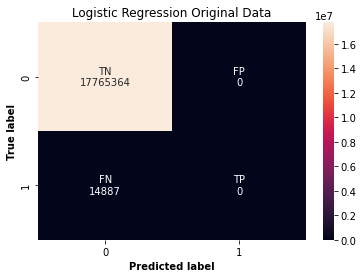

In [38]:
LR.fit(X_train, y_train)

evaluation_report(LR, X_test, y_test, 'Logistic Regression', ' Original Data')

### LR -- SMOTE + RAND || 1:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.78      0.87  17765364
           1       0.00      0.95      0.01     14887

    accuracy                           0.78  17780251
   macro avg       0.50      0.86      0.44  17780251
weighted avg       1.00      0.78      0.87  17780251
 

AUC-ROC
0.9008162604618639
Confusion Matrix


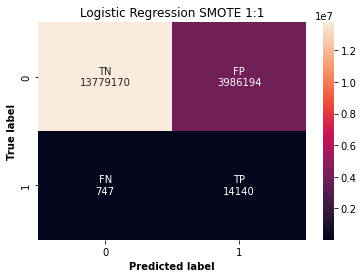

In [39]:
LR.fit(X_train_1_1, y_train_1_1)

evaluation_report(LR, X_test, y_test, 'Logistic Regression', ' SMOTE 1:1')

### LR -- SMOTE + RAND || 2:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92  17765364
           1       0.00      0.84      0.01     14887

    accuracy                           0.85  17780251
   macro avg       0.50      0.84      0.46  17780251
weighted avg       1.00      0.85      0.92  17780251
 

AUC-ROC
0.9015996704223213
Confusion Matrix


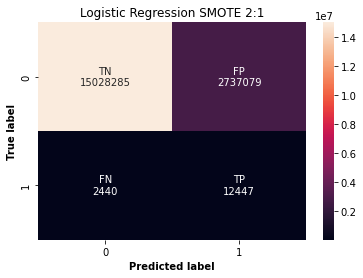

In [40]:
LR.fit(X_train_2_1, y_train_2_1)

evaluation_report(LR, X_test, y_test, 'Logistic Regression', ' SMOTE 2:1')

### LR -- SMOTE + RAND || 4:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96  17765364
           1       0.01      0.53      0.01     14887

    accuracy                           0.92  17780251
   macro avg       0.50      0.72      0.48  17780251
weighted avg       1.00      0.92      0.96  17780251
 

AUC-ROC
0.9021599345462237
Confusion Matrix


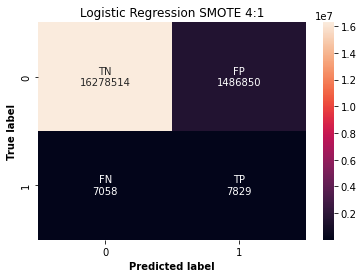

In [41]:
LR.fit(X_train_4_1, y_train_4_1)

evaluation_report(LR, X_test, y_test, 'Logistic Regression', ' SMOTE 4:1')

### LR -- SMOTE + RAND || 10:1

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99  17765364
           1       0.01      0.10      0.01     14887

    accuracy                           0.99  17780251
   macro avg       0.50      0.54      0.50  17780251
weighted avg       1.00      0.99      0.99  17780251
 

AUC-ROC
0.9023132104269579
Confusion Matrix


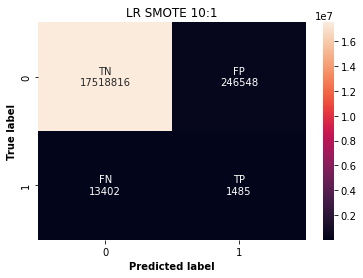

In [38]:
LR.fit(X_train_10_1, y_train_10_1)

evaluation_report(LR, X_test, y_test, 'LR', ' SMOTE 10:1')

## Suport Vector Machine

In [ ]:
SVM = SVC(C= 10, gamma= 'scale', kernel= 'rbf')
SVM.fit(X_train, y_train)

evaluation_report(SVM, X_test, y_test, 'SVM', ' Original Data')

### SVM -- SMOTE + RAND || 1:1

In [ ]:
SVM.fit(X_train_1_1, y_train_1_1)

evaluation_report(SVM, X_test, y_test, 'SVM ', ' SMOTE 1:1')

### SVM -- SMOTE + RAND ||2:1

In [ ]:
SVM.fit(X_train_2_1, y_train_2_1)

evaluation_report(SVM, X_test, y_test, 'SVM ', ' SMOTE 2:1')

### SVM -- SMOTE + RAND || 4:1

In [ ]:
SVM.fit(X_train_4_1, y_train_4_1)

evaluation_report(SVM, X_test, y_test, 'SVM ', ' SMOTE 4:1')

### SVM -- SMOTE + RAND || 10:1

In [ ]:
SVM.fit(X_train_10_1, y_train_10_1)

evaluation_report(SVM, X_test, y_test, 'SVM ', ' SMOTE 1:10')

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

NN_pred_train = mlp.predict(X_train)
NN_pred_test = mlp.predict(X_test)

evaluation_report(mlp, X_test, y_test, 'Neural Network', ' Original')

### NN -- SMOTE + RAND || 1:1

In [ ]:
mlp.fit(X_train_1_1, y_train_1_1)

evaluation_report(mlp, X_test, y_test, 'mlp ', ' SMOTE 1:1')

### NN -- SMOTE + RAND || 1:2

In [ ]:
mlp.fit(X_train_1_2, y_train_1_2)

evaluation_report(mlp, X_test, y_test, 'mlp ', ' SMOTE 1:1')

### NN -- SMOTE + RAND || 1:4

In [ ]:
mlp.fit(X_train_1_4, y_train_1_4)

evaluation_report(mlp, X_test, y_test, 'mlp ', ' SMOTE 1:1')

### NN -- SMOTE + RAND || 1:10

In [ ]:
mlp.fit(X_train_1_10, y_train_1_10)

evaluation_report(mlp, X_test, y_test, 'mlp ', ' SMOTE 1:1')

## RF

In [ ]:
RF = RandomForestClassifier(max_features = 'sqrt', n_estimators = 100, n_jobs=-1)                      
RF.fit(X_train, y_train)
evaluation_report(RF, X_test, y_test, 'RF ', ' Original Data')

### RF -- SMOTE + RAND || 1:1

In [ ]:
RF.fit(X_train_1_1, y_train_1_1)

evaluation_report(RF, X_test, y_test, 'RF ', ' SMOTE 1:1')

### RF -- SMOTE + RAND || 1:2

In [ ]:
RF.fit(X_train_1_2, y_train_1_2)

evaluation_report(RF, X_test, y_test, 'RF ', ' SMOTE 1:2')

### RF -- SMOTE + RAND || 1:4

In [ ]:
RF.fit(X_train_1_4, y_train_1_4)

evaluation_report(RF, X_test, y_test, 'RF ', ' SMOTE 1:4')

### RF -- SMOTE + RAND || 1:10

In [ ]:
RF.fit(X_train_1_10, y_train_1_10)

evaluation_report(RF, X_test, y_test, 'RF ', ' SMOTE 1:10')